### AP156 Activity 4: Chain Vibrations
#### Nica Jane B. Ferrer
#### 2013-25765


 Oscillator Chain 



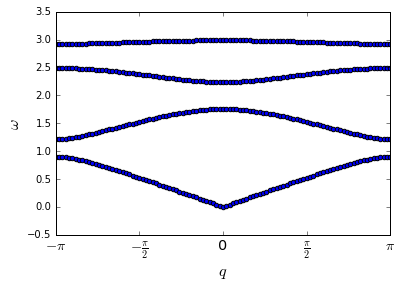

eigensys
(array([  8.91547595e+00 +9.53496037e-18j,
        -1.45488673e-15 -1.05005012e-16j,
         5.00000000e+00 -7.89488102e-17j,   3.08452405e+00 -9.60423295e-19j]), array([[ -5.18871540e-01 -4.64838566e-17j,
          5.00000000e-01 -2.59475784e-17j,
         -7.07106781e-01 -5.28363843e-18j,
          2.86128473e-01 +2.96350159e-17j],
       [  6.62590637e-01 +0.00000000e+00j,
          5.00000000e-01 -4.17695608e-17j,
         -4.91513154e-17 +2.07776132e-17j,
          7.46886103e-01 +0.00000000e+00j],
       [ -5.18871540e-01 -6.35714600e-17j,
          5.00000000e-01 +0.00000000e+00j,
          7.07106781e-01 +0.00000000e+00j,
          2.86128473e-01 -7.83177365e-18j],
       [  1.50060978e-01 +9.96828570e-18j,
          5.00000000e-01 -1.87874225e-17j,
         -4.33940061e-17 -5.67628256e-18j,
         -5.27657220e-01 -8.08467888e-17j]]))


In [11]:
#!/usr/bin/env python

"""
Code for Chain Vibrations (W.Kinzel/G.Reents, Physics by Computer)

This code is based on chain.m listed in Appendix E of the book and will
replicate Fig. 2.12 of the book.
"""

__author__ = "Christian Alis"
__credits__ = "W.Kinzel/G.Reents"
import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, inv, eig

%matplotlib inline
# what does ** in **kwargs do?
def main(f=1.0, m1=0.4, m2=1.0, **kwargs):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    """ main(f, m1, m2, **kwargs)
    
    Plots the eigenmodes and prints the corresponding eigenvalues and eigenvectors given the mass matrix and the matrix \
    for the forces acting on each of the mass in chain vibrations \
     Parameters
    ----------
    f: value of spring constant \
    m1: mass of the smaller mass \
    m2: mass of the heavier mass \
    
    Returns
    -------
    eigensys: separate arrays containing the eigenvalues and eigenvalues of the system
    """
    print "\n Oscillator Chain \n"
    forcematrix = lambda q: np.array([[2*f            ,  -f,   0, -f*np.exp(-1j*q)],
                               [-f             , 2*f,  -f,                0],
                               [0              , -f,    2*f,            -f ],
                               [-f*np.exp(1j*q), 0,    -f,             2*f]])
    # will cyclic rearrangements of m1 and m2 below change the results? Try it
    ####ANSWER: The cyclic rearrangements of m1 and m2 does not change the results obtained
    # what will be the dimensions/shape of massmat?
    ####ANSWER: It must be a four by four diagonal matrix
    massmat = np.diag([m1, m1, m1, m2])
    # what happens if inv(massmat) * mat1(q) is used instead of 
    # inv(massmat).dot(mat1(q))?
    ####ANSWER: The plot is shown in the cell below. As can be seen from the plot, there are only two bands where 
    #####the value of omega for all values of q is the same.
    invmassdotforcemat = lambda q: inv(massmat).dot(forcematrix(q))
    # what is the python type of kwargs?
    #####ANSWER: in this case, kwargs is a float since it assigns the variable plot_step to the value np.pi/50
    plot_step = kwargs.get('plot_step', np.pi/50)
    # complete the following line. you should use plot_step
    x_axis = [i*plot_step for i in np.arange(-50,51)] 
    # what is the difference between eigvals() and eig()?
    ####ANSWER: When using eigvals(), the output is the set of arrays containing four eigenvalues. On the other hand,
    ######### when using eig(), the output is the set of arrays containing the eigenvalues, and also the eigenvectors.
    # replace the following line to use eig() instead of eigvals()
    eigenlist = [eig(invmassdotforcemat(x)) for x in x_axis]

    # complete the following lines

    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][0][0]) for i in xrange(0,len(x_axis))] )
    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][0][1]) for i in xrange(0,len(x_axis))] )
    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][0][2]) for i in xrange(0,len(x_axis))] )
    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][0][3]) for i in xrange(0,len(x_axis))] )



    plt.xticks([-np.pi, -np.pi/2., 0.0, np.pi/2, np.pi],
               [r"$-\pi$", r"$-\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$",
                r"$\pi$"])
    plt.xlim(-np.pi,np.pi)
    plt.xlabel('$q$', fontsize = 16)
    plt.ylabel('$\omega$', fontsize = 16)
    plt.tick_params('x', labelsize='x-large')
    
    plt.show()

    # why is the argument of mat2(), 0.0?
    #### ANSWER: In this case, we are interested at the system when q = 0.0
    # what does the parameter of mat2() mean?
    #### ANSWER: It takes in the value of the argument as th value of q, and then calculate the dot product \
    #### of the inverse mass matrix and the force matrix
    eigensys = eig(invmassdotforcemat(0.0))
    print 'eigensys'
    return eigensys
    
    # additional: 
    # * rename mat1 and mat2 to be more descriptive
    # * describe the result if the values of m1 and m2 are interchanged
    # * describe the effect of different values of f
    # optional challenging exercise: animate the eigenmodes as in Fig. 2.13

if __name__ == "__main__":
    print main()



 Oscillator Chain 



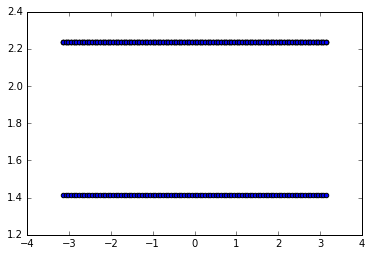

eigensys
(array([ 5.+0.j,  5.+0.j,  5.+0.j,  2.+0.j]), array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]]))


In [2]:
#!/usr/bin/env python

"""
Code for Chain Vibrations (W.Kinzel/G.Reents, Physics by Computer)

This code is based on chain.m listed in Appendix E of the book and will
replicate Fig. 2.12 of the book.
"""

__author__ = "Christian Alis"
__credits__ = "W.Kinzel/G.Reents"
import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals, inv, eig

%matplotlib inline
# what does ** in **kwargs do?
def main(f=1.0, m1=0.4, m2=1.0, **kwargs):
    # Add a docstring for this function. Parameters should be properly
    # documented and the docstring itself should follow the scipy/numpy
    # docstring convention and ReST format
    print "\n Oscillator Chain \n"
    mat1 = lambda q: np.array([[2*f            ,  -f,   0, -f*np.exp(-1j*q)],
                               [-f             , 2*f,  -f,                0],
                               [0              , -f,    2*f,            -f ],
                               [-f*np.exp(1j*q), 0,    -f,             2*f]])
    # will cyclic rearrangements of m1 and m2 below change the results? Try it
    ####ANSWER: The cyclic rearrangements of m1 and m2 does not change the results obtained
    # what will be the dimensions/shape of massmat?
    ####ANSWER: It must be a four by four diagonal matrix
    massmat = np.diag([m1, m1, m1, m2])
    # what happens if inv(massmat) * mat1(q) is used instead of 
    # inv(massmat).dot(mat1(q))?
    ####ANSWER:
    mat2 = lambda q: inv(massmat)*(mat1(q))
    # what is the python type of kwargs?
    plot_step = kwargs.get('plot_step', np.pi/50)
    # complete the following line. you should use plot_step
    x_axis = [i*plot_step for i in np.arange(-50,51)] 
    # what is the difference between eigvals() and eig()?
    # replace the following line to use eig() instead of eigvals()
    eigenlist = [eigvals(mat2(x)) for x in x_axis]

    # complete the following lines

    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][0]) for i in xrange(0,len(x_axis))] )
    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][1]) for i in xrange(0,len(x_axis))] )
    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][2]) for i in xrange(0,len(x_axis))] )
    plt.scatter(x_axis, [cmath.sqrt(eigenlist[i][3]) for i in xrange(0,len(x_axis))] )
    plt.show()



#     plt.xticks(# ... ,
#                [r"$\pi$", r"$\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$",
#                 r"$\pi$"])
#     plt.xlim(-np.pi,np.pi)
#     # add x-large axis labels
#     # ...
#     plt.tick_params('x', labelsize='x-large')
    plt.show()

    # why is the argument of mat2(), 0.0?
    # what does the parameter of mat2() mean?
    eigensys = eig(mat2(0.0))
    print 'eigensys'
    return eigensys
    
    # additional: 
    # * rename mat1 and mat2 to be more descriptive
    # * describe the result if the values of m1 and m2 are interchanged
    # * describe the effect of different values of f
    # optional challenging exercise: animate the eigenmodes as in Fig. 2.13

if __name__ == "__main__":
    print main()


In [103]:
help(eig)

Help on function eig in module scipy.linalg.decomp:

eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True)
    Solve an ordinary or generalized eigenvalue problem of a square matrix.
    
    Find eigenvalues w and right or left eigenvectors of a general matrix::
    
        a   vr[:,i] = w[i]        b   vr[:,i]
        a.H vl[:,i] = w[i].conj() b.H vl[:,i]
    
    where ``.H`` is the Hermitian conjugation.
    
    Parameters
    ----------
    a : (M, M) array_like
        A complex or real matrix whose eigenvalues and eigenvectors
        will be computed.
    b : (M, M) array_like, optional
        Right-hand side matrix in a generalized eigenvalue problem.
        Default is None, identity matrix is assumed.
    left : bool, optional
        Whether to calculate and return left eigenvectors.  Default is False.
    right : bool, optional
        Whether to calculate and return right eigenvectors.  Default is True.
    overwrite_a : bool, 